<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Visualizing_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
df = pd.read_excel("Debourgh-Sales.xlsx",sheet_name='Sheet2')

In [51]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [52]:
df.isna().sum()

Years    0
Sales    0
dtype: int64

In [53]:
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

##**Line plot**
---



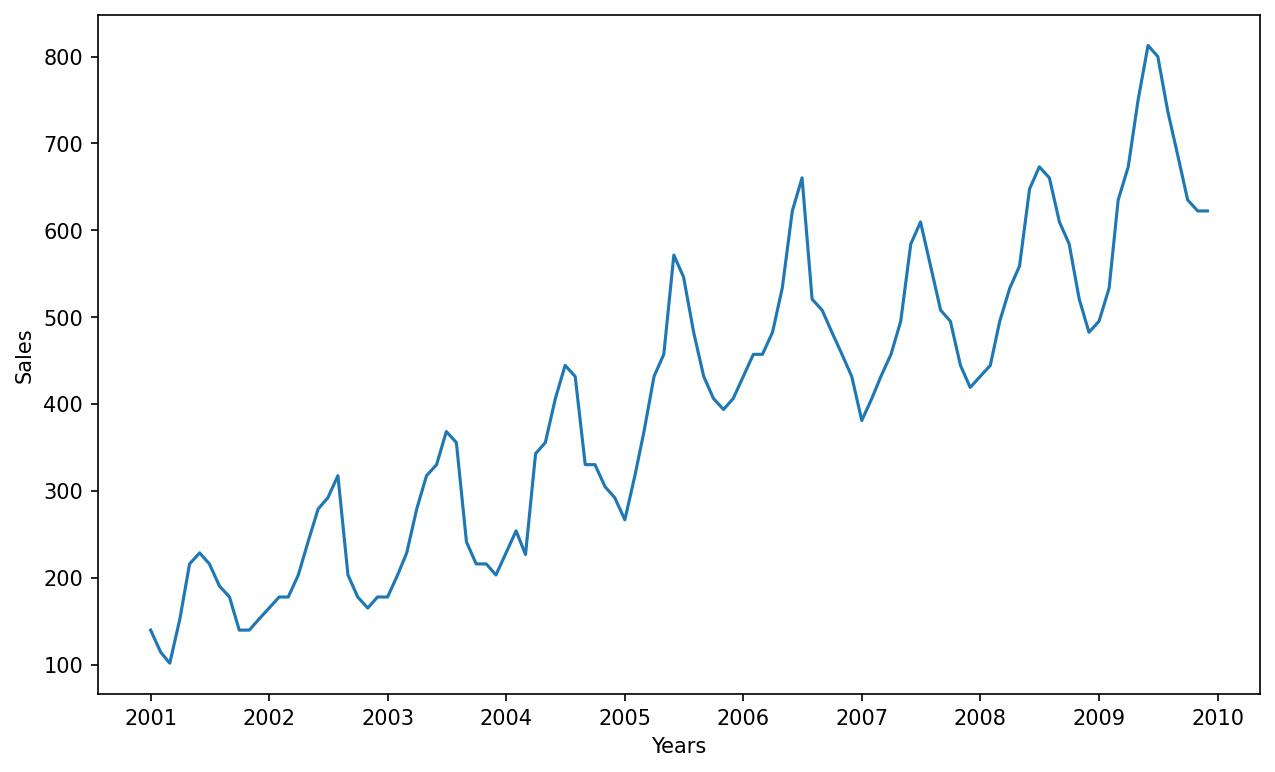

In [54]:
plt.figure(figsize=(10,6), dpi=150)
sns.lineplot(data=df,x='Years', y='Sales')
plt.show()

In [78]:
df1 = df.set_index('Years')

In [80]:
df1.head()

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9


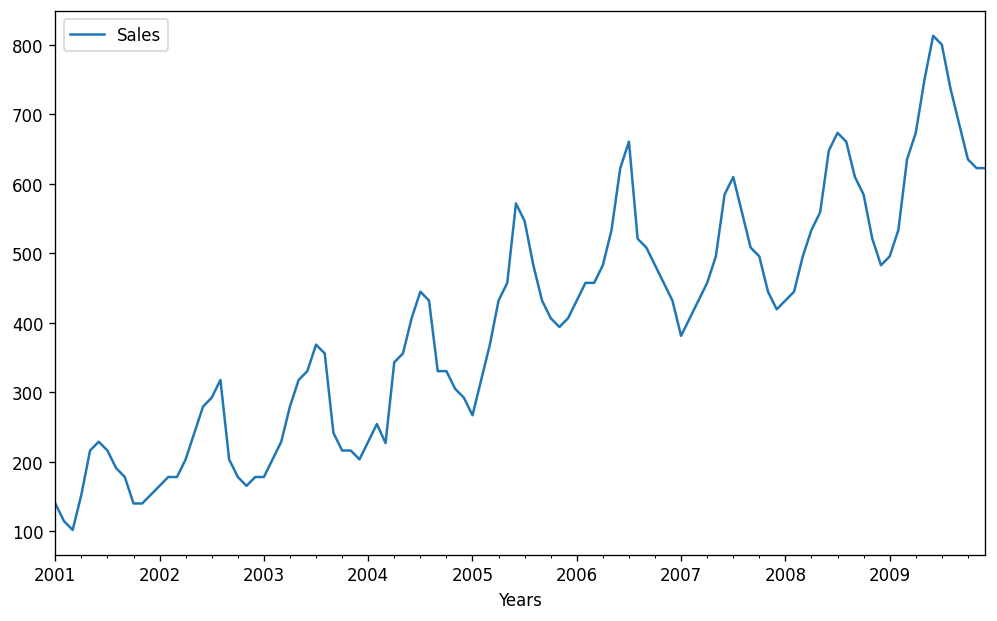

In [82]:
fig,ax = plt.subplots(figsize=(10,6), dpi=120)
df1.plot(kind='line', ax = ax)
plt.show()

In [35]:
df.columns

Index(['Sales'], dtype='object')

In [73]:
df['year'] = df['Years'].dt.year
df['quarter'] = df['Years'].dt.quarter


In [74]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


##**Line plot**

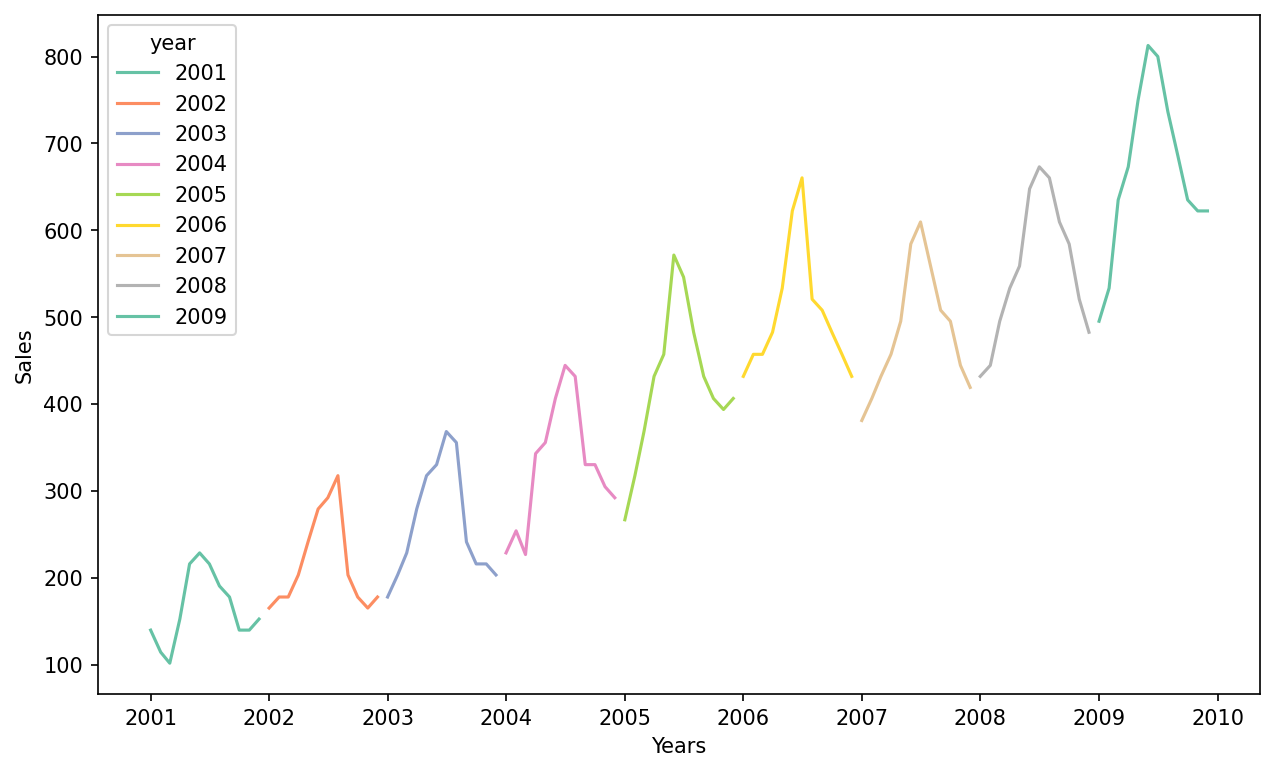

In [77]:
plt.figure(figsize=(10,6), dpi=150)
sns.lineplot(data=df,x='Years', y='Sales',hue='year',palette='Set2')
plt.show()

## **Area Plot**

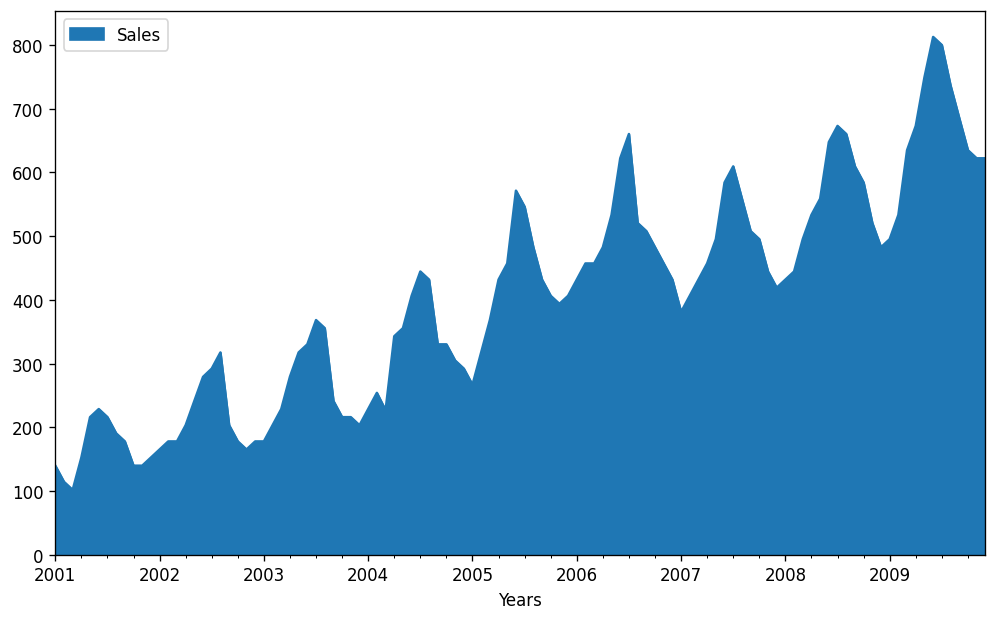

In [84]:
fig,ax = plt.subplots(figsize=(10,6), dpi=120)
df1.plot(kind='area',ax=ax)
plt.show()

## **Bar** **plot**
We need to do some Data preprocessing to draw the bar plot

In [98]:
df_year = df[['Sales','year']].groupby(by='year').sum().reset_index()

In [99]:
df_year.head()

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0


In [100]:
df_year.columns


Index(['year', 'Sales'], dtype='object')

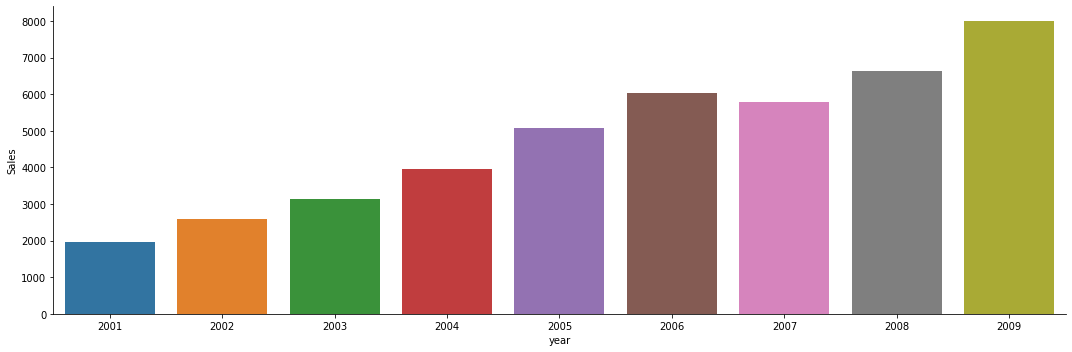

In [104]:
sns.catplot(data =df_year, x='year', y='Sales', kind ='bar', aspect = 3)

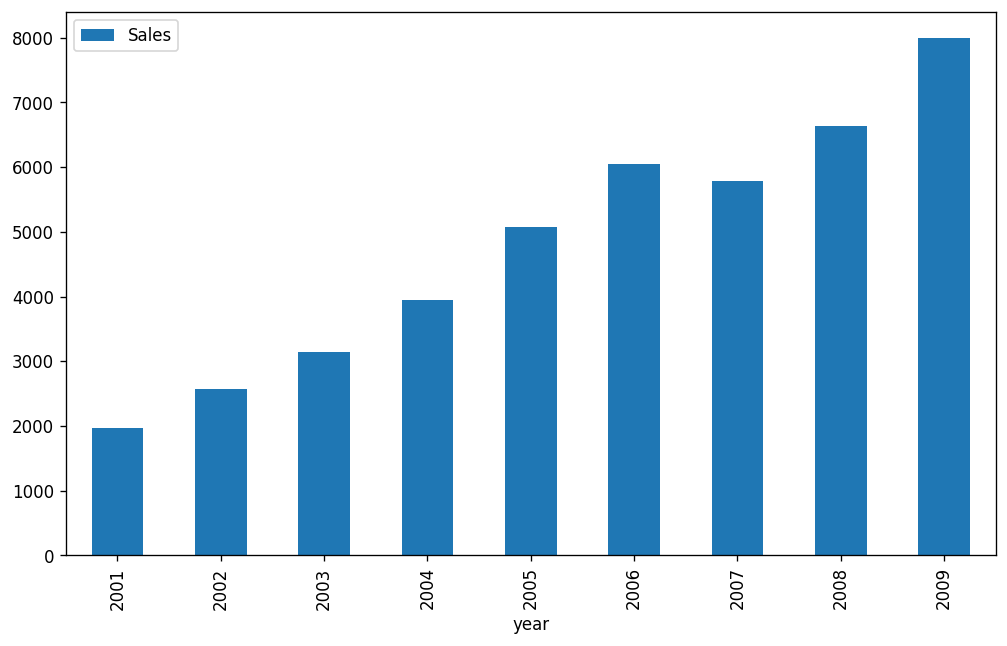

In [107]:
fig,ax = plt.subplots(figsize=(10,6), dpi =120)
df_year.set_index('year').plot(kind='bar', ax=ax)
plt.show()

##**Stacked bar plot**

In [108]:
sales =df[['Sales','year','quarter']].groupby(by=['year','quarter']).sum().values

In [109]:
sales

array([[ 355.6],
       [ 596.9],
       [ 584.2],
       [ 431.8],
       [ 520.7],
       [ 723.6],
       [ 812.8],
       [ 520.7],
       [ 609.6],
       [ 927.1],
       [ 965.2],
       [ 635. ],
       [ 709.3],
       [1104.9],
       [1206.5],
       [ 927.1],
       [ 952.5],
       [1460.5],
       [1460.5],
       [1206.5],
       [1346.2],
       [1638.3],
       [1689.1],
       [1371.6],
       [1219.2],
       [1536.7],
       [1676.4],
       [1358.9],
       [1371.6],
       [1739.9],
       [1943.1],
       [1587.5],
       [1663.7],
       [2235.2],
       [2222.2],
       [1879.6]])

In [110]:
sales.shape

(36, 1)

9 years and each year has 4 quarters, so it becomes 36 quarters

In [114]:
df_sales = pd.DataFrame(sales.reshape(9,4),index=list(range(2001,2010)),columns=['Q1','Q2','Q3','Q4'])

In [115]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


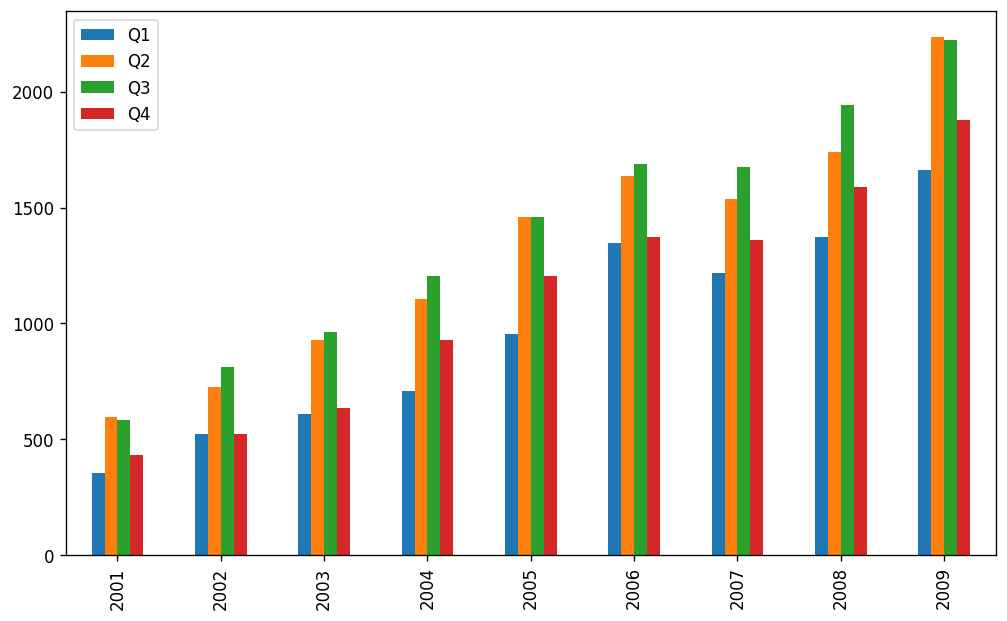

In [118]:
fig,ax = plt.subplots(figsize=(10,6), dpi =120)
df_sales.plot(kind='bar',ax=ax)
plt.show()


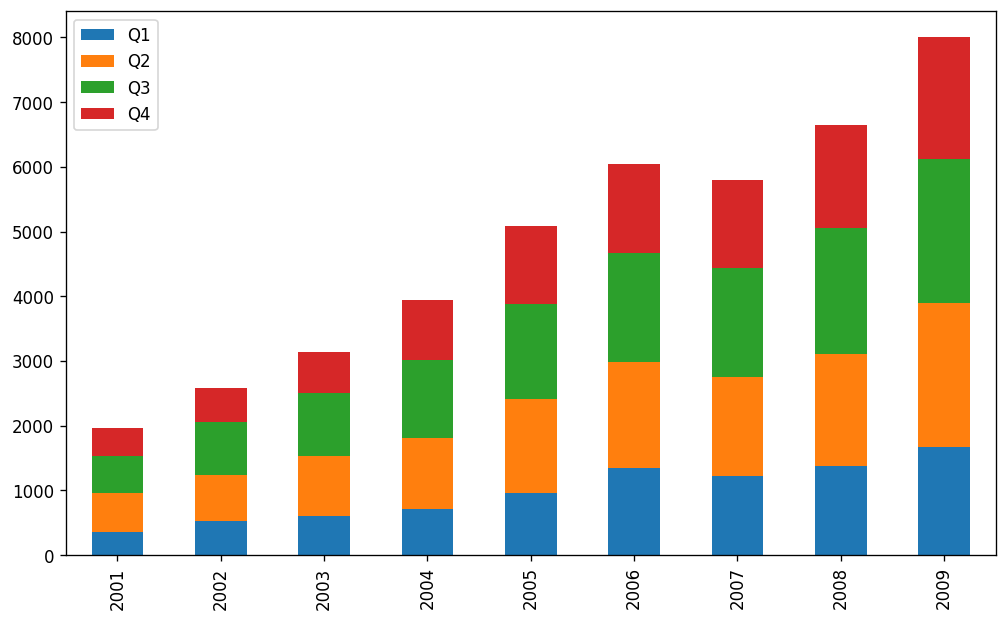

In [119]:
fig,ax = plt.subplots(figsize=(10,6), dpi =120)
df_sales.plot(kind='bar',ax=ax, stacked = True)
plt.show()

##**Heatmap**



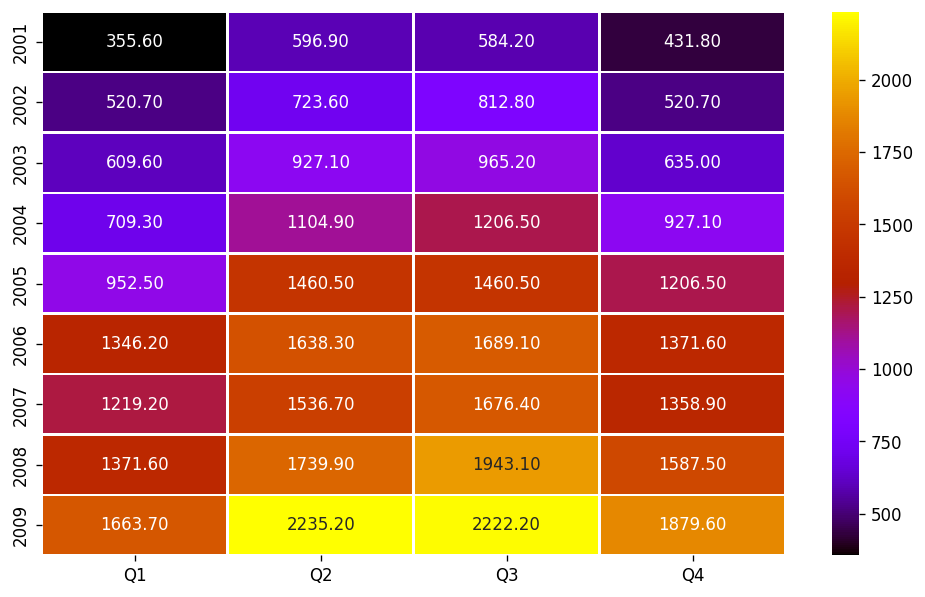

In [123]:
plt.figure(figsize=(10,6), dpi=120)
sns.heatmap(df_sales,annot=True, fmt='.2f',cmap='gnuplot',linewidths =1)